<a href="https://colab.research.google.com/github/AndreyBarTF/turbines_autumn_2022-Homework/blob/%D0%94%D0%97.3/BarbashinTFe-01-20%2C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   ФИО Барбашин Андрей Алексеевич
*   Группа ТФэ-01-20
*   Тлеграмм @QwertyAlexx

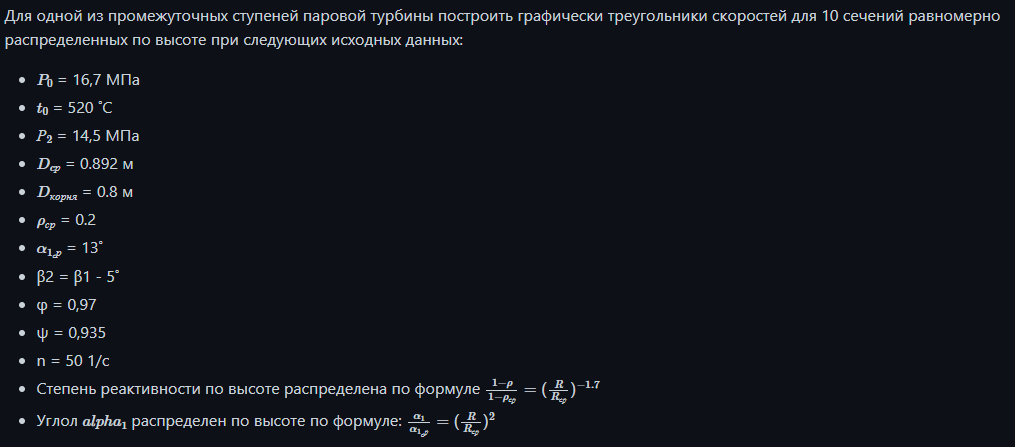

In [6]:
!pip install iapws

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


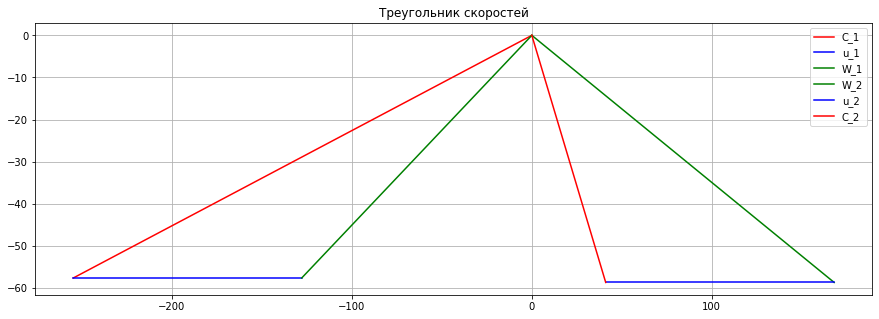

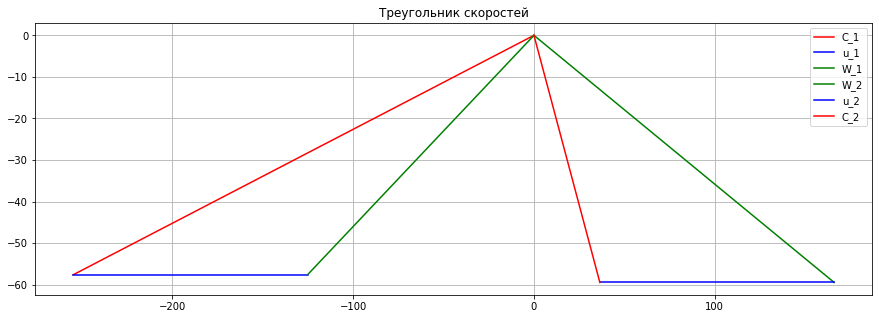

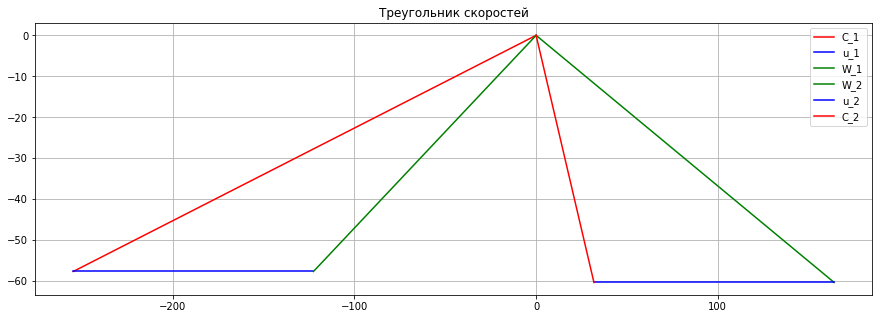

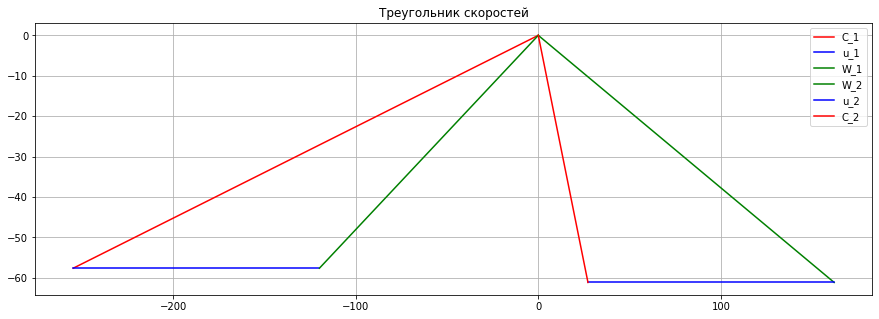

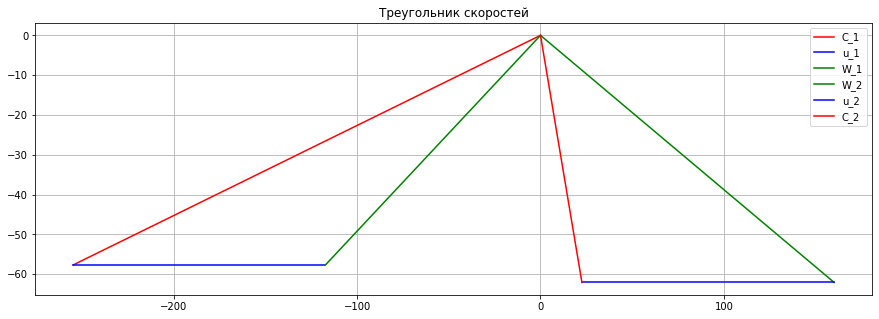

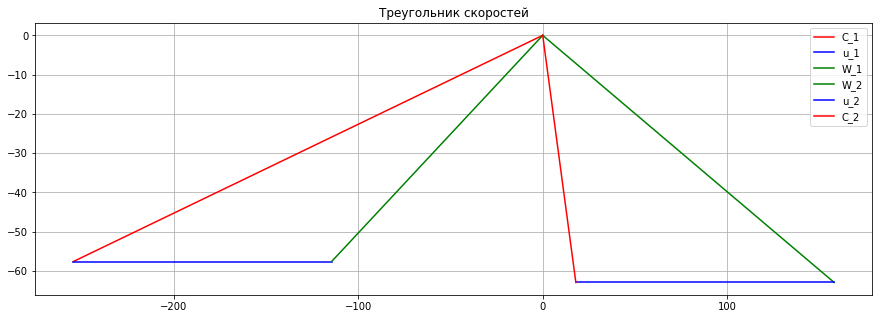

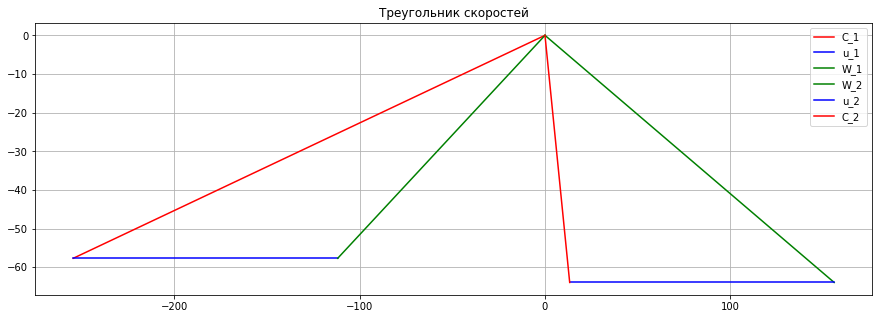

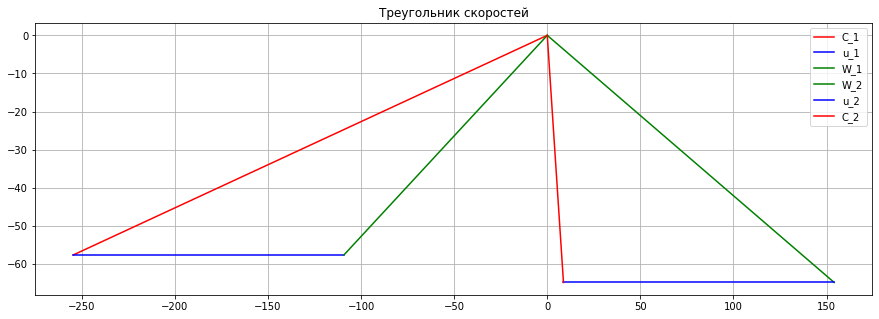

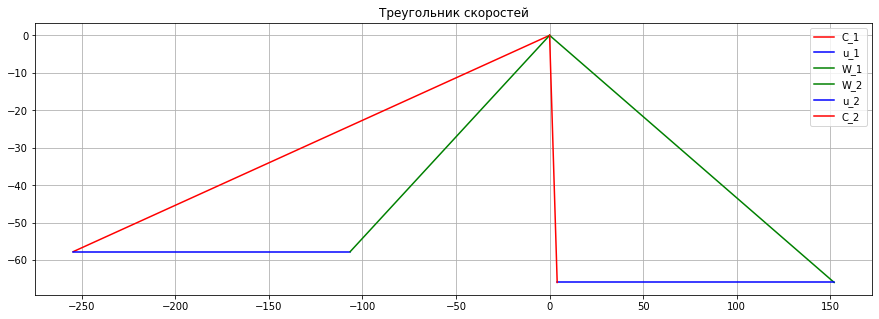

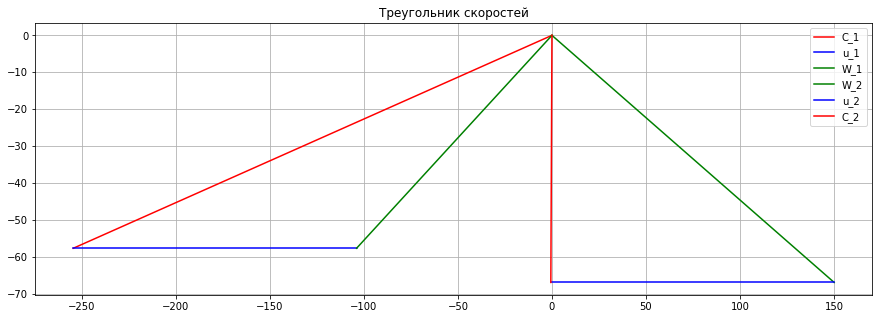

In [37]:
from pyparsing.helpers import null_debug_action
import iapws
from iapws import IAPWS97 as gas
import matplotlib.pyplot as plt
import math
import numpy as np

MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

p_0 = 16.7 * MPa
t_0 = to_kelvin(520)
p_2 = 14.5 * MPa
avg_diameter = 0.892
diameter_inlet = 0.8
degree_of_reaction_avg = 0.2
alpha_1_deg_avg = 13
delta_beta_deg = 5
fi = 0.97
psi = 0.935
rotation_speed = 50
diameter_outlet = avg_diameter * 2 - diameter_inlet
n = 11
step = (diameter_outlet - diameter_inlet)/n
diam = list(np.arange(diameter_inlet, diameter_outlet, step))

def all(p_0,t_0,p_2,avg_diameter,R,R_avg,degree_of_reaction_avg,alpha_1_deg_avg):
  degree_of_reaction = (1/((R/R_avg) ** 1.7)) * (degree_of_reaction_avg - 1) + 1
  alpha_1_deg = ((R/R_avg) ** 2) * alpha_1_deg_avg
  inlet_point = gas(P=p_0 * unit, T=t_0)
  outlet_point = gas(P=p_2 * unit, s=inlet_point.s)
  theoretical_heat_drop = inlet_point.h - outlet_point.h
  stator_heat_drop = theoretical_heat_drop * (1 - degree_of_reaction)
  rotor_heat_drop = theoretical_heat_drop * degree_of_reaction
  c_1t = (2 * 1000 * stator_heat_drop) ** 0.5
  c_1 = c_1t * fi
  u = math.pi * avg_diameter * rotation_speed
  sin_alpha_1 = math.sin(math.radians(alpha_1_deg))
  cos_alpha_1 = math.cos(math.radians(alpha_1_deg))
  w_1 = (c_1 ** 2 + u ** 2 - 2 * c_1 * u * cos_alpha_1) ** 0.5
  w_2t = (w_1 ** 2 + 2 * rotor_heat_drop * 1000) ** 0.5
  w_2 = w_2t * psi
  beta_1 = math.atan(sin_alpha_1 / (cos_alpha_1 - u / c_1))
  beta_1_deg = math.degrees(beta_1)
  beta_2_deg = beta_1_deg - delta_beta_deg
  beta_1_deg, beta_2_deg
  sin_beta_2 = math.sin(math.radians(beta_2_deg))
  cos_beta_2 = math.cos(math.radians(beta_2_deg))
  c_2 = (w_2 ** 2 + u ** 2 - 2 * w_2 * u * cos_beta_2) ** 0.5
  c1_plot = [[0, -c_1 * cos_alpha_1], [0, -c_1 * sin_alpha_1]]
  u1_plot = [[-c_1 * cos_alpha_1, -c_1 * cos_alpha_1 + u], [-c_1 * sin_alpha_1, -c_1 * sin_alpha_1]]
  w1_plot = [[0, -c_1 * cos_alpha_1 + u], [0, -c_1 * sin_alpha_1]]
  w2_plot = [[0, w_2 * cos_beta_2], [0, -w_2 * sin_beta_2]]
  u2_plot = [[w_2 * cos_beta_2, w_2 * cos_beta_2 - u], [-w_2 * sin_beta_2, -w_2 * sin_beta_2]]
  c2_plot = [[0, w_2 * cos_beta_2 - u], [0, -w_2 * sin_beta_2]]
  fig, ax = plt.subplots(1, 1, figsize=(15, 5))
  ax.plot(c1_plot[0], c1_plot[1], label='C_1', c='red')
  ax.plot(u1_plot[0], u1_plot[1], label='u_1', c='blue')
  ax.plot(w1_plot[0], w1_plot[1], label='W_1', c='green')
  ax.plot(w2_plot[0], w2_plot[1], label='W_2', c='green')
  ax.plot(u2_plot[0], u2_plot[1], label='u_2', c='blue')
  ax.plot(c2_plot[0], c2_plot[1], label='C_2', c='red')
  ax.set_title("Треугольник скоростей",)
  ax.legend()
  ax.grid();
  
for i in range(len(diam)-1):
    R = diam[i]/2    
    avg_diameter = (diam[i]+diam[i+1])/2
    R_avg = avg_diameter/2
    all(p_0,t_0,p_2,avg_diameter,R,R_avg,degree_of_reaction_avg,alpha_1_deg_avg)